In [ ]:
from google.colab import files
files.upload()


In [ ]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d bmadushanirodrigo/fracture-multi-region-x-ray-data
!unzip fracture-multi-region-x-ray-data.zip


Streaming output truncated to the last 5000 lines.
  inflating: Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/14-rotated2-rotated2-rotated3 (1).jpg  
  inflating: Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/14-rotated2-rotated2-rotated3-rotated1 (1).jpg  
  inflating: Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/14-rotated2-rotated2-rotated3-rotated1.jpg  
  inflating: Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/14-rotated2-rotated2-rotated3.jpg  
  inflating: Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/14-rotated2-rotated2.jpg  
  inflating: Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/14-rotated2-rotated3 (1).jpg  
  inflating: Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Total images loaded: 10581
Total labels loaded: 10581


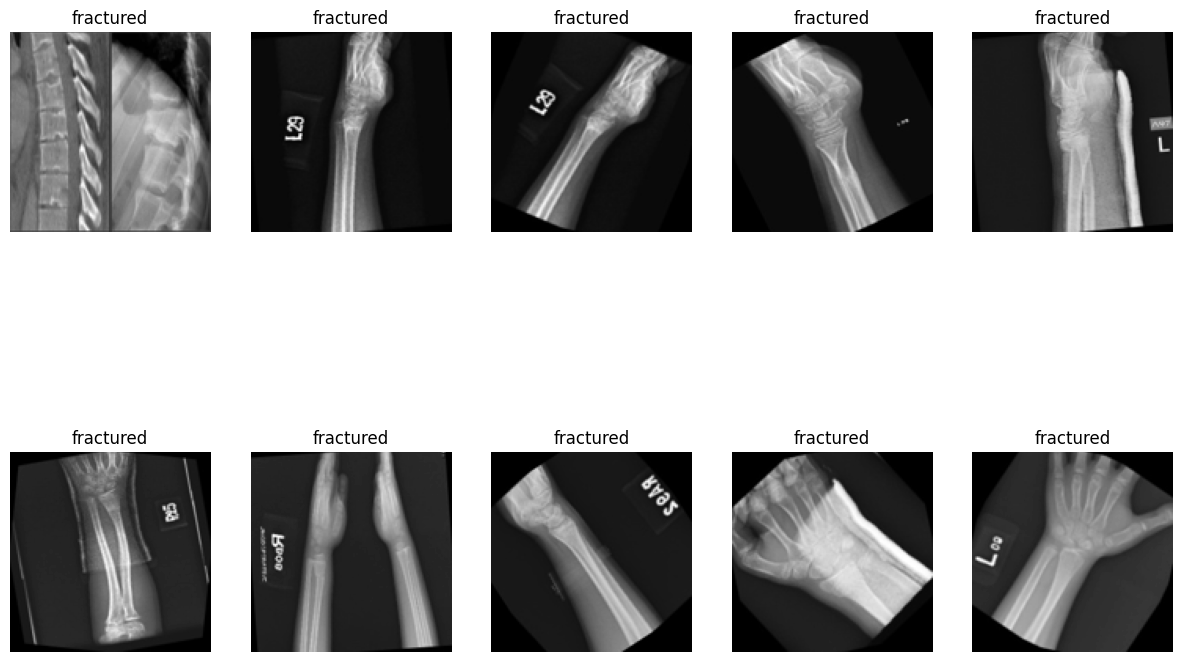

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from PIL import Image, ImageFile

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# To handle truncated images
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Define the path to the dataset
data_path = '/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification'  # Replace with the actual path to the dataset

# Supported image extensions
image_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif'}

# Load images and labels
images = []
labels = []

# Check if the data_path exists
if not os.path.exists(data_path):
    print(f"Data path does not exist: {data_path}")
else:
    for split in ['train', 'test', 'val']:  # Assuming you have train, test, and val folders
        split_path = os.path.join(data_path, split)
        if not os.path.exists(split_path):
            print(f"Split path does not exist: {split_path}")
            continue

        for folder in os.listdir(split_path):
            folder_path = os.path.join(split_path, folder)
            if not os.path.exists(folder_path):
                print(f"Folder path does not exist: {folder_path}")
                continue

            for file in os.listdir(folder_path):
                image_path = os.path.join(folder_path, file)
                if os.path.splitext(image_path)[1].lower() in image_extensions:
                    try:
                        # Use PIL to open the image first
                        with Image.open(image_path) as img:
                            img = img.convert('L')  # Convert to grayscale
                            img = img.resize((128, 128))
                            img = np.array(img)
                            images.append(img)
                            labels.append(folder)  # Use folder name as the label
                    except Exception as e:
                        print(f"Failed to load image {image_path} with error: {e}")
                else:
                    print(f"Skipping non-image file: {image_path}")

images = np.array(images)
labels = np.array(labels)

# Check if images and labels are loaded correctly
print(f"Total images loaded: {len(images)}")
print(f"Total labels loaded: {len(labels)}")

# Normalize the images
images = images / 255.0

# One-hot encode the labels
label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Reshape the data to fit the model input
X_train = X_train.reshape(-1, 128, 128, 1)
X_test = X_test.reshape(-1, 128, 128, 1)

# Function to display a grid of images
def display_images(images, labels, num_images=10):
    plt.figure(figsize=(15, 10))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].reshape(128, 128), cmap='gray')
        plt.title(labels[i])
        plt.axis('off')
    plt.show()

# Convert labels back to original form for display
labels_display = label_binarizer.inverse_transform(labels)

# Display sample images
display_images(X_train, labels_display[:len(X_train)])


In [ ]:
from tensorflow.keras.utils import to_categorical

# Encode labels as integers
labels = np.array([0 if label == 'not fractured' else 1 for label in labels])

# One-hot encode the labels
labels = to_categorical(labels)

# Check if labels are one-hot encoded properly
print(f"One-hot encoded labels shape: {labels.shape}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Reshape the data to fit the model input
X_train = X_train.reshape(-1, 128, 128, 1)
X_test = X_test.reshape(-1, 128, 128, 1)

# Verify the shapes of the data
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


One-hot encoded labels shape: (10581, 2)
X_train shape: (8464, 128, 128, 1)
y_train shape: (8464, 2)
X_test shape: (2117, 128, 128, 1)
y_test shape: (2117, 2)


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Total images loaded: 10581
Total labels loaded: 10581
One-hot encoded labels shape: (10581, 2)
X_train shape: (8464, 128, 128, 1)
y_train shape: (8464, 2)
X_test shape: (2117, 128, 128, 1)
y_test shape: (2117, 2)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                       

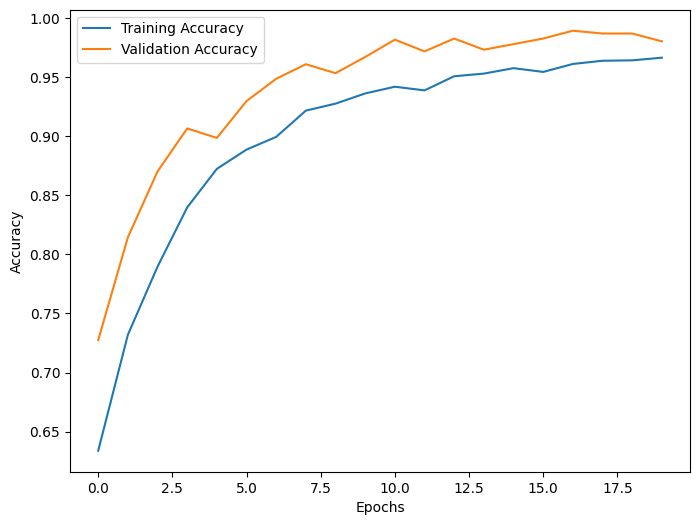

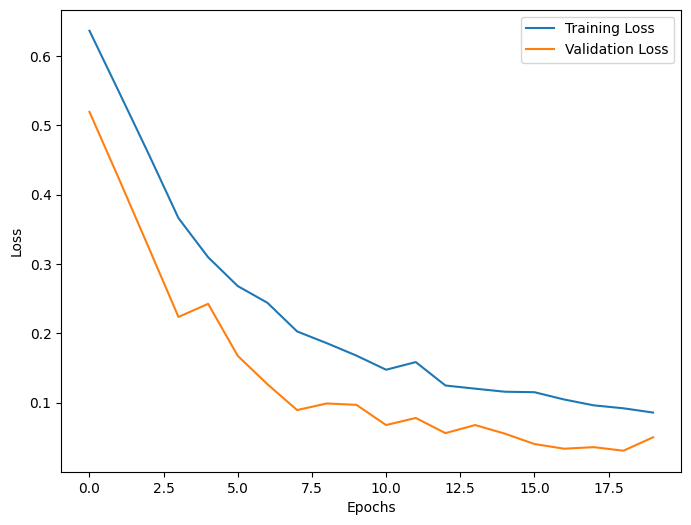

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from PIL import Image, ImageFile
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# To handle truncated images
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Define the path to the dataset
data_path = '/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification'  # Replace with the actual path to the dataset

# Supported image extensions
image_extensions = {'.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif'}

# Load images and labels
images = []
labels = []

# Check if the data_path exists
if not os.path.exists(data_path):
    print(f"Data path does not exist: {data_path}")
else:
    for split in ['train', 'test', 'val']:  # Assuming you have train, test, and val folders
        split_path = os.path.join(data_path, split)
        if not os.path.exists(split_path):
            print(f"Split path does not exist: {split_path}")
            continue

        for folder in os.listdir(split_path):
            folder_path = os.path.join(split_path, folder)
            if not os.path.exists(folder_path):
                print(f"Folder path does not exist: {folder_path}")
                continue

            for file in os.listdir(folder_path):
                image_path = os.path.join(folder_path, file)
                if os.path.splitext(image_path)[1].lower() in image_extensions:
                    try:
                        # Use PIL to open the image first
                        with Image.open(image_path) as img:
                            img = img.convert('L')  # Convert to grayscale
                            img = img.resize((128, 128))
                            img = np.array(img)
                            images.append(img)
                            labels.append(folder)  # Use folder name as the label
                    except Exception as e:
                        print(f"Failed to load image {image_path} with error: {e}")
                else:
                    print(f"Skipping non-image file: {image_path}")

images = np.array(images)
labels = np.array(labels)

# Check if images and labels are loaded correctly
print(f"Total images loaded: {len(images)}")
print(f"Total labels loaded: {len(labels)}")

# Normalize the images
images = images / 255.0

# Encode labels as integers
labels = np.array([0 if label == 'not fractured' else 1 for label in labels])

# One-hot encode the labels
labels = to_categorical(labels)

# Check if labels are one-hot encoded properly
print(f"One-hot encoded labels shape: {labels.shape}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Reshape the data to fit the model input
X_train = X_train.reshape(-1, 128, 128, 1)
X_test = X_test.reshape(-1, 128, 128, 1)

# Verify the shapes of the data
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # Ensure output layer matches number of classes
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Define data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Fit the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_test, y_test),
                    epochs=20)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

# Plot training and validation accuracy over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss over epochs
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Save the model
model.save('bone_fracture_cnn_model.h5')


In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')


67/67 - 0s - loss: 0.0500 - accuracy: 0.9802 - 400ms/epoch - 6ms/step
Test accuracy: 0.9801605939865112


In [ ]:
# Generate predictions on the test set
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)


67/67 [==============================] - 42s 5ms/step


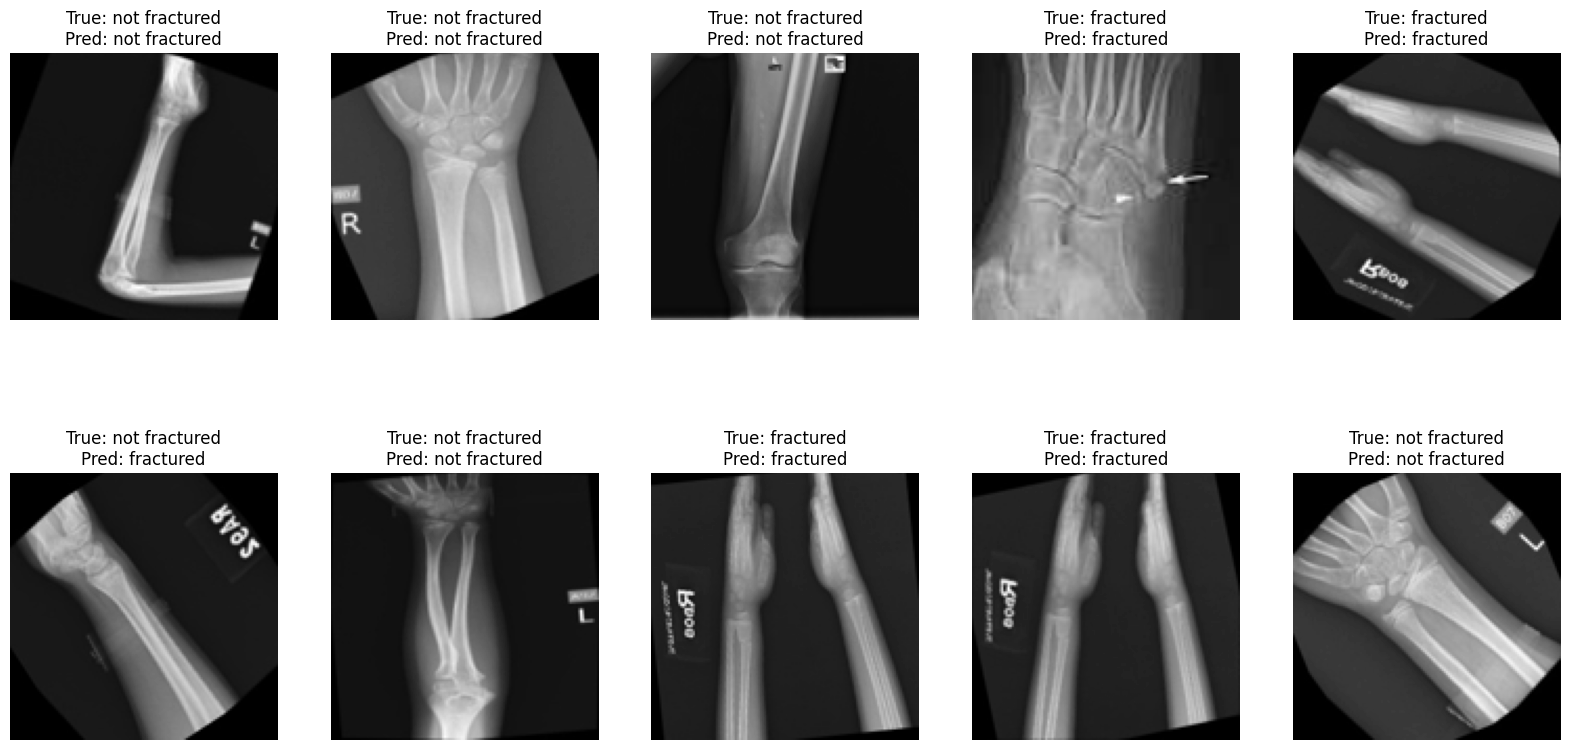

In [ ]:
def plot_sample_predictions(X_test, true_labels, predicted_labels, num_samples=10):
    plt.figure(figsize=(20, 10))
    for i in range(num_samples):
        plt.subplot(2, num_samples//2, i + 1)
        plt.imshow(X_test[i].reshape(128, 128), cmap='gray')
        true_label = 'fractured' if true_labels[i] == 1 else 'not fractured'
        predicted_label = 'fractured' if predicted_labels[i] == 1 else 'not fractured'
        plt.title(f"True: {true_label}\nPred: {predicted_label}")
        plt.axis('off')
    plt.show()

# Plot sample predictions
plot_sample_predictions(X_test, true_labels, predicted_labels, num_samples=10)


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns


In [ ]:
# Generate predictions on the test set
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Calculate classification report
class_report = classification_report(true_labels, predicted_labels, target_names=['not fractured', 'fractured'])

# Calculate individual metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)


67/67 [==============================] - 0s 5ms/step


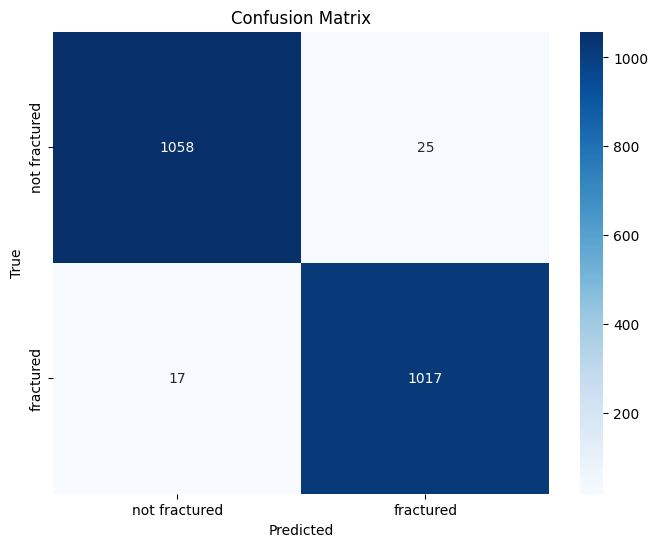

Classification Report:
                precision    recall  f1-score   support

not fractured       0.98      0.98      0.98      1083
    fractured       0.98      0.98      0.98      1034

     accuracy                           0.98      2117
    macro avg       0.98      0.98      0.98      2117
 weighted avg       0.98      0.98      0.98      2117

Accuracy: 0.9802
Precision: 0.9760
Recall: 0.9836
F1 Score: 0.9798


In [ ]:
# Display confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['not fractured', 'fractured'], yticklabels=['not fractured', 'fractured'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Display classification report
print("Classification Report:\n", class_report)

# Display individual metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
